<a href="https://colab.research.google.com/github/FerrazThales/DepressionSymptosAnalysis/blob/main/An%C3%A1lise_Estat%C3%ADstica_dos_Sintomas_de_Depress%C3%A3o.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

<h1 align="center"><b>Encontre eu e meus projetos nas redes sociais!</b></h1>
<table>
  <tr>
  <td><a href="https://thalesferraz.medium.com/">
  <img src="https://github.com/FerrazThales/FerrazThales/blob/main/logo_gif.gif?raw=true" width="900" title="Olá, Meu nome é Thales e sou cientista de Dados!"/>
  </a>
  </td>
  <td><a href="https://github.com/FerrazThales">
  <img hspace=30 vspace=110 src="https://github.com/FerrazThales/FerrazThales/blob/main/GitHub.jpg?raw=true" width="80%" title="Entre em meu Github e veja mais projetos!" /> 
  </a>
  </td>
  <td>
  <a href="https://thalesferraz.medium.com/default-prediction-prevendo-a-inadimpl%C3%AAncia-em-institui%C3%A7%C3%B5es-financeiras-f16ab7126381">
  <img vspace=110 src="https://github.com/FerrazThales/FerrazThales/blob/main/medium.png?raw=true" width="800" title="Veja este meu projeto no Medium!"/>
  </a>
  </td>
  <td><a href="https://www.linkedin.com/in/thalesdefreitasferraz/"><img vspace=150 src="https://github.com/FerrazThales/FerrazThales/blob/main/linkedin.png?raw=true" width="80%" title="Vamos trocar uma idéia sobre Data Science no LinkedIn?" />
  </a>
  </td>
  </tr>
</table>

* resumo 
* sumário

texto resumo




[link de um artigo explicando o questionário](https://wwwn.cdc.gov/nchs/nhanes/2009-2010/DPQ_F.htm)

explicar o questionário

texto explicando

In [142]:
#@title Pacotes que serão utilizados no Projeto

import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from scipy import stats
import numpy as np
from scipy.stats import skew, kurtosis,shapiro,levene

%matplotlib inline

In [2]:
#@title Funções e Listas Utilizadas durante o projeto

# função que auxilia a calcular o score da depressão
def level(score):

  if score < 5:
    level = 'minimal'
  elif score >= 5 and score < 10:
    level = 'mild'
  elif score >= 10 and score < 15:
    level = 'moderate'
  elif score >= 15 and score < 20:
    level = 'moderately severe'
  else:
    level = 'severe depression'

  return level

# função para criar rótulos  -> https://thalesferraz.medium.com/como-fazer-gr%C3%A1ficos-rotulados-em-python-8d6d72006eaf
def rotulos(ax, y, distancia, titulo):
  ax.get_yaxis().set_visible(False)
  ax.set_frame_on(False)
  ax.tick_params(axis='both',colors='grey',length=0,labelsize=12)
  ax.set_title(titulo,loc='left',pad=30,fontdict={'fontsize':16},color='#474747')
  for i in range(len(y)):
        ax.text(i,y[i] + distancia,'{:,}'.format(int(y[i])).replace(',','.'),ha='center',fontsize=16,color='grey')


# lista com as perguntas e respostas do questionário
perguntas_questionarios = ['Nas últimas 2 semanas, com que frequência você se sentiu incomodado pelos seguintes problemas: pouco interesse ou prazer em fazer as coisas? Você diria...',
                           'Nas últimas 2 semanas, com que frequência você foi incomodado pelos seguintes problemas: sentindo-se para baixo, deprimido ou sem esperança?',
                           'Nas últimas 2 semanas, com que frequência você foi incomodado pelos seguintes problemas: dificuldade para adormecer ou permanecer dormindo ou dormir demais?',
                           'Nas últimas 2 semanas, com que frequência você foi incomodado pelos seguintes problemas: sentindo-se cansado ou com pouca energia?',
                           'Nas últimas 2 semanas, com que frequência você foi incomodado pelos seguintes problemas: falta de apetite ou alimentação excessiva?',
                           'Nas últimas 2 semanas, com que frequência você foi incomodado pelos seguintes problemas: sentiu-se mal consigo mesmo - ou que você é um fracasso ou decepcionou a si mesmo ou a sua família?',
                           'Nas últimas 2 semanas, com que frequência você foi incomodado pelos seguintes problemas: dificuldade para se concentrar em coisas, como ler jornal ou assistir TV?',
                           'Nas últimas 2 semanas, com que frequência você foi incomodado pelos seguintes problemas: mover-se ou falar tão devagar que outras pessoas poderiam ter notado? Ou o oposto - estar tão inquieto ou inquieto que tem se movimentado muito mais do que o normal?',
                           'Nas últimas 2 semanas, com que frequência você foi incomodado pelos seguintes problemas: Pensamentos de que seria melhor você morrer ou se machucar de alguma forma?']

# lista com as respostas padrão do questionário
respostas_questionarios = ['Nenhuma vez',
                           'Menos de uma semana',
                           'Uma semana ou mais',
                           'Quase todos os dias']

#1. Importando as Bases de Dados

In [3]:
# guardando o endereço das base de dados do github
base_01_path = "https://raw.githubusercontent.com/FerrazThales/DepressionSymptosAnalysis/main/DataBase/DEMO_PHQ.csv"
base_02_path = "https://raw.githubusercontent.com/FerrazThales/DepressionSymptosAnalysis/main/DataBase/PAG_HEI.csv"

# armazenando em uma variável
df = pd.read_csv(base_01_path), pd.read_csv(base_02_path)

# Print da quantidade de registro e de features
print('-'* 30)
for i in range(2):
  print('{}ª BASE DE DADOS'.format(i+1))
  print('Registros: {:,} - Features: {}'.format(df[i].shape[0], df[i].shape[1]))
print('-'* 30)

------------------------------
1ª BASE DE DADOS
Registros: 5,334 - Features: 15
2ª BASE DE DADOS
Registros: 9,424 - Features: 17
------------------------------


link para encontrar o dicionário das variáveis
Primeira base de dados: [link](https://wwwn.cdc.gov/nchs/nhanes/2005-2006/DPQ_D.htm)

#### Visualizando as bases de dados

In [4]:
# Visualizando as 3 primeiras entradas da primeira base de dados
df[0].head(3)

,SEQN,DPQ010,DPQ020,DPQ030,DPQ040,DPQ050,DPQ060,DPQ070,DPQ080,DPQ090,RIAGENDR,RIDAGEYR,RIDRETH1,DMDEDUC,INDFMINC
0,31130,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2,85,3,4,4.0
1,31131,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2,44,4,4,11.0
2,31132,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1,70,3,5,11.0


In [5]:
# Visualizando as 3 primeiras entradas da segunda base de dados
df[1].head(3)

,SEQN,PAG_MINW,ADHERENCE,HEI2015C1_TOTALVEG,HEI2015C2_GREEN_AND_BEAN,HEI2015C3_TOTALFRUIT,HEI2015C4_WHOLEFRUIT,HEI2015C5_WHOLEGRAIN,HEI2015C6_TOTALDAIRY,HEI2015C7_TOTPROT,HEI2015C8_SEAPLANT_PROT,HEI2015C9_FATTYACID,HEI2015C10_SODIUM,HEI2015C11_REFINEDGRAIN,HEI2015C12_SFAT,HEI2015C13_ADDSUG,HEI2015_TOTAL_SCORE
0,31128,NaN,NaN,3.083350,0.0,3.927008,5.000000,0.000000,5.000000,4.251329,0.000000,2.487572,6.911882,10.000000,0.818029,6.408092,47.887262
1,31129,285.450346,2.0,1.697761,0.0,3.731602,4.929186,0.527631,3.887809,4.693141,0.928562,3.740758,6.146441,7.274979,8.006457,0.000000,45.564326
2,31130,0.000000,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


Percebemos que temos algumas pessoas que aparecem na primeira e na segunda

## Agrupando as Bases de dados

In [6]:
# verificando se todos os valores da primeira base estão na segunda base de dados
# assert: caso dê erro, o código não irá ser executado
assert df[1].SEQN.isin(df[0].SEQN).sum() == df[0].shape[0]

# agrupando as duas bases de dados
df_new = pd.merge(df[0],df[1], how = 'inner')

# verificando a nova base de dados
print('Nova Base de Dados')
print('Linhas: {:,} - Colunas: {}'.format(df_new.shape[0], df_new.shape[1]))

df_new.head(3)

Nova Base de Dados
Linhas: 5,334 - Colunas: 31


,SEQN,DPQ010,DPQ020,DPQ030,DPQ040,DPQ050,DPQ060,DPQ070,DPQ080,DPQ090,...,HEI2015C5_WHOLEGRAIN,HEI2015C6_TOTALDAIRY,HEI2015C7_TOTPROT,HEI2015C8_SEAPLANT_PROT,HEI2015C9_FATTYACID,HEI2015C10_SODIUM,HEI2015C11_REFINEDGRAIN,HEI2015C12_SFAT,HEI2015C13_ADDSUG,HEI2015_TOTAL_SCORE
0,31130,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,31131,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,3.141062,4.071959,2.052399,0.684985,2.297100,9.512964,0.438428,3.919226,35.553899
2,31132,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,5.0,4.448512,5.000000,0.000000,2.050769,7.369489,8.887880,8.186877,9.099088,63.551696


In [7]:
# separando o nome das colunas que envolvem as perguntas
columns_name = df_new.columns[:10]
columns_name

Index(['SEQN', 'DPQ010', 'DPQ020', 'DPQ030', 'DPQ040', 'DPQ050', 'DPQ060',
       'DPQ070', 'DPQ080', 'DPQ090'],
      dtype='object')

In [8]:
# verificando valores nulos das perguntas
(df_new[columns_name[1:]].isnull().sum()).sort_values(ascending=False).to_frame('Quantidade de Nulos')

,Quantidade de Nulos
DPQ010,498
DPQ020,498
DPQ030,498
DPQ040,498
DPQ050,498
DPQ060,498
DPQ070,498
DPQ080,498
DPQ090,498


In [9]:
# Excluindo os valores nulos

# colocar a porcentagem que retirou do dataset
df_new.dropna(subset = columns_name[1:], inplace = True)
df_new.head(3)

,SEQN,DPQ010,DPQ020,DPQ030,DPQ040,DPQ050,DPQ060,DPQ070,DPQ080,DPQ090,...,HEI2015C5_WHOLEGRAIN,HEI2015C6_TOTALDAIRY,HEI2015C7_TOTPROT,HEI2015C8_SEAPLANT_PROT,HEI2015C9_FATTYACID,HEI2015C10_SODIUM,HEI2015C11_REFINEDGRAIN,HEI2015C12_SFAT,HEI2015C13_ADDSUG,HEI2015_TOTAL_SCORE
1,31131,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.000000,3.141062,4.071959,2.052399,0.684985,2.297100,9.512964,0.438428,3.919226,35.553899
2,31132,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,5.000000,4.448512,5.000000,0.000000,2.050769,7.369489,8.887880,8.186877,9.099088,63.551696
3,31134,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,2.217331,2.313900,5.000000,1.268648,2.958985,0.000000,5.627488,5.863078,5.878686,42.886826


## Criando Novas Variáveis

In [10]:
# se recusou a responder será considerado como pontuação zero
df_new[columns_name[1:]] = df_new[columns_name[1:]].replace(7,0)

# não deu a resposta da pergunta será considerado como pontuação zero
df_new[columns_name[1:]] = df_new[columns_name[1:]].replace(9,0)

# criando o score do PHQ -9 -> https://www.youtube.com/watch?v=q8zvPF87nPc&t=65s
df_new['score'] = np.sum(df_new[columns_name[1:]], axis = 1)

# inserindo o estado de depressão e a severidade da depressão -> baseado em: https://pubmed.ncbi.nlm.nih.gov/11556941/
df_new['depression'] = np.where(df_new.score >= 10, 1, 0)
df_new['depression_level'] = [level(x) for x in df_new['score']] # estamos utilizando a função level criada no início do código

# retirando a resposta das perguntas e a coluna identificadora(SEQN)
df_new.drop(columns = ['SEQN'], inplace = True)

# visualizando a base de dados resultante
df_new.head(3)

,DPQ010,DPQ020,DPQ030,DPQ040,DPQ050,DPQ060,DPQ070,DPQ080,DPQ090,RIAGENDR,...,HEI2015C8_SEAPLANT_PROT,HEI2015C9_FATTYACID,HEI2015C10_SODIUM,HEI2015C11_REFINEDGRAIN,HEI2015C12_SFAT,HEI2015C13_ADDSUG,HEI2015_TOTAL_SCORE,score,depression,depression_level
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2,...,2.052399,0.684985,2.297100,9.512964,0.438428,3.919226,35.553899,0.0,0,minimal
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1,...,0.000000,2.050769,7.369489,8.887880,8.186877,9.099088,63.551696,0.0,0,minimal
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1,...,1.268648,2.958985,0.000000,5.627488,5.863078,5.878686,42.886826,0.0,0,minimal


## Renomeando as colunas de acordo com o dicionário dos dados

In [11]:
# verificando os nomes das colunas
df_new.columns

Index(['DPQ010', 'DPQ020', 'DPQ030', 'DPQ040', 'DPQ050', 'DPQ060', 'DPQ070',
       'DPQ080', 'DPQ090', 'RIAGENDR', 'RIDAGEYR', 'RIDRETH1', 'DMDEDUC',
       'INDFMINC', 'PAG_MINW', 'ADHERENCE', 'HEI2015C1_TOTALVEG',
       'HEI2015C2_GREEN_AND_BEAN', 'HEI2015C3_TOTALFRUIT',
       'HEI2015C4_WHOLEFRUIT', 'HEI2015C5_WHOLEGRAIN', 'HEI2015C6_TOTALDAIRY',
       'HEI2015C7_TOTPROT', 'HEI2015C8_SEAPLANT_PROT', 'HEI2015C9_FATTYACID',
       'HEI2015C10_SODIUM', 'HEI2015C11_REFINEDGRAIN', 'HEI2015C12_SFAT',
       'HEI2015C13_ADDSUG', 'HEI2015_TOTAL_SCORE', 'score', 'depression',
       'depression_level'],
      dtype='object')

In [12]:
# criando uma lista com nome de colunas mais legíveis a análise
rename_columns = ['Q1 - Pouco Interesse','Q2 - Deprimido', 'Q3 - Insonia ou Sonolencia','Q4 - Cansaco','Q5 - Inapetencia ou Gula',
                  'Q6 - Decepcao','Q7 - Concentracao','Q8 - Lentidao ou Agitacao','Q9 - Automutilacao',
                  'Genero', 'Idade(anos)','Raça/Etnia','Escolaridade','Renda anual familiar (US$)',
                  'Atividade Aerobica (min)','Aderencia ao PAG','Vegetais','Verduras','Frutas','Frutas in Natura',
                  'Grao Integrais','Laticinios','Proteinas','Plantas Marinhas e Proteinas Vegetais','Acido-Graxo','Sodio','Graos refinados',
                  'Gordura saturada','Acucares','Score(HEI)','Score(PHQ-9)','Depressao','Depressao Level']

# renomeando o dataset
df_new.set_axis(rename_columns,axis=1,inplace=True)

# visualizando as 3 primeiras entradas do dataset
df_new.head(3).round(2)

,Q1 - Pouco Interesse,Q2 - Deprimido,Q3 - Insonia ou Sonolencia,Q4 - Cansaco,Q5 - Inapetencia ou Gula,Q6 - Decepcao,Q7 - Concentracao,Q8 - Lentidao ou Agitacao,Q9 - Automutilacao,Genero,...,Plantas Marinhas e Proteinas Vegetais,Acido-Graxo,Sodio,Graos refinados,Gordura saturada,Acucares,Score(HEI),Score(PHQ-9),Depressao,Depressao Level
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2,...,2.05,0.68,2.30,9.51,0.44,3.92,35.55,0.0,0,minimal
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1,...,0.00,2.05,7.37,8.89,8.19,9.10,63.55,0.0,0,minimal
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1,...,1.27,2.96,0.00,5.63,5.86,5.88,42.89,0.0,0,minimal


## Tratando os últimos dados nulos

In [13]:
# verificando dados nulos
df_new.isnull().sum().sort_values(ascending=False)

Vegetais                                 99
Verduras                                 99
Frutas in Natura                         99
Grao Integrais                           99
Laticinios                               99
Proteinas                                99
Plantas Marinhas e Proteinas Vegetais    99
Acido-Graxo                              99
Sodio                                    99
Graos refinados                          99
Gordura saturada                         99
Acucares                                 99
Score(HEI)                               99
Frutas                                   99
Renda anual familiar (US$)               36
Score(PHQ-9)                              0
Depressao                                 0
Q1 - Pouco Interesse                      0
Q2 - Deprimido                            0
Aderencia ao PAG                          0
Atividade Aerobica (min)                  0
Escolaridade                              0
Raça/Etnia                      

In [14]:
# visualizando no dataset quais os valores estão nulos
df_new[df_new["Vegetais"].isnull()]

,Q1 - Pouco Interesse,Q2 - Deprimido,Q3 - Insonia ou Sonolencia,Q4 - Cansaco,Q5 - Inapetencia ou Gula,Q6 - Decepcao,Q7 - Concentracao,Q8 - Lentidao ou Agitacao,Q9 - Automutilacao,Genero,...,Plantas Marinhas e Proteinas Vegetais,Acido-Graxo,Sodio,Graos refinados,Gordura saturada,Acucares,Score(HEI),Score(PHQ-9),Depressao,Depressao Level
28,1.0,1.0,3.0,3.0,3.0,0.0,1.0,0.0,0.0,2,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,12.0,1,moderate
68,1.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,1,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,3.0,0,minimal
82,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,0,minimal
117,0.0,0.0,1.0,1.0,0.0,1.0,0.0,0.0,0.0,1,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,3.0,0,minimal
130,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,0,minimal
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5092,0.0,3.0,0.0,3.0,3.0,3.0,0.0,1.0,2.0,2,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,15.0,1,moderately severe
5140,0.0,3.0,0.0,3.0,3.0,0.0,0.0,0.0,0.0,2,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,9.0,0,mild
5161,1.0,1.0,1.0,2.0,0.0,0.0,0.0,0.0,0.0,2,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,5.0,0,mild
5214,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,2,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0,0,minimal


texto explicativo

In [15]:
# excluindo os dados nulos do questionário da segunda base de dados (ex: Laticínios -> NaN)
df_new.dropna(subset = ['Vegetais'], inplace =  True)

# inserindo a mediana dos valores onde a Renda Anual Familiar é Nula
df_new.fillna(df_new['Renda anual familiar (US$)'].median(),
              inplace = True)

# 2. Análise Exploratória dos Dados

In [16]:
df_new.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 4737 entries, 1 to 5333
Data columns (total 33 columns):
 #   Column                                 Non-Null Count  Dtype  
---  ------                                 --------------  -----  
 0   Q1 - Pouco Interesse                   4737 non-null   float64
 1   Q2 - Deprimido                         4737 non-null   float64
 2   Q3 - Insonia ou Sonolencia             4737 non-null   float64
 3   Q4 - Cansaco                           4737 non-null   float64
 4   Q5 - Inapetencia ou Gula               4737 non-null   float64
 5   Q6 - Decepcao                          4737 non-null   float64
 6   Q7 - Concentracao                      4737 non-null   float64
 7   Q8 - Lentidao ou Agitacao              4737 non-null   float64
 8   Q9 - Automutilacao                     4737 non-null   float64
 9   Genero                                 4737 non-null   int64  
 10  Idade(anos)                            4737 non-null   int64  
 11  Raça

texto -> conventer em variáveis categóricas

In [17]:
perguntas = ['Q1 - Pouco Interesse','Q2 - Deprimido', 'Q3 - Insonia ou Sonolencia','Q4 - Cansaco','Q5 - Inapetencia ou Gula',
                'Q6 - Decepcao','Q7 - Concentracao','Q8 - Lentidao ou Agitacao','Q9 - Automutilacao']

categoricas = ['Genero','Raça/Etnia','Escolaridade','Renda anual familiar (US$)',
                'Aderencia ao PAG','Depressao','Depressao Level']

numericas = list(set(df_new.columns).difference(categoricas,perguntas))

print('Quantidade de Variáveis:')
print('Numéricas: {} -  Categóricas: {} - Perguntas: {}'.format(len(numericas), len(categoricas),len(perguntas)))

Quantidade de Variáveis:
Numéricas: 17 -  Categóricas: 7 - Perguntas: 9


## Análise das Variáveis Numéricas

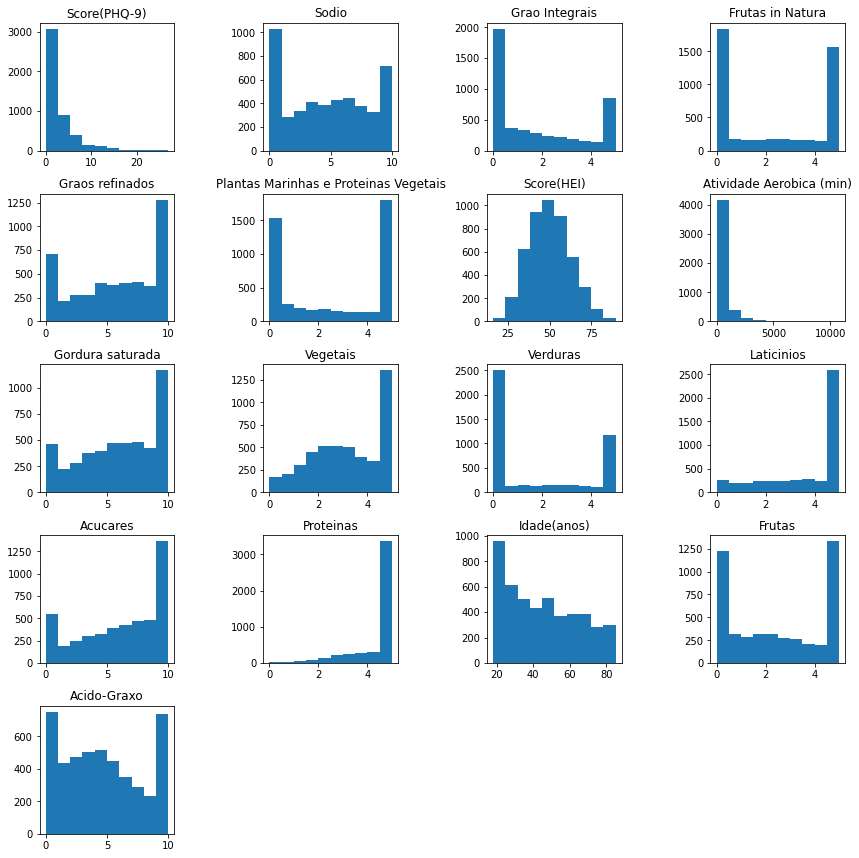

In [18]:
# histogramas das variáveis numéricas
df_new[numericas].hist(figsize = (12,12), grid=False)
plt.tight_layout(pad=1.0);

In [19]:
# verificar a Skew e Kurtosis de Cada Variável
for n in numericas:
  s = skew(df_new[n])
  k = kurtosis(df_new[n])
  print('Variável: {} | Skew: {:.2f} | Kurtosis: {:.2f}'.format(n,s,k))
  print('--'*35)
del n,s,k

Variável: Score(PHQ-9) | Skew: 2.27 | Kurtosis: 6.41
----------------------------------------------------------------------
Variável: Sodio | Skew: 0.03 | Kurtosis: -1.29
----------------------------------------------------------------------
Variável: Grao Integrais | Skew: 0.64 | Kurtosis: -1.15
----------------------------------------------------------------------
Variável: Frutas in Natura | Skew: 0.12 | Kurtosis: -1.75
----------------------------------------------------------------------
Variável: Graos refinados | Skew: -0.35 | Kurtosis: -1.20
----------------------------------------------------------------------
Variável: Plantas Marinhas e Proteinas Vegetais | Skew: -0.03 | Kurtosis: -1.77
----------------------------------------------------------------------
Variável: Score(HEI) | Skew: 0.23 | Kurtosis: -0.31
----------------------------------------------------------------------
Variável: Atividade Aerobica (min) | Skew: 4.59 | Kurtosis: 35.21
---------------------------------

In [143]:
# teste de shapiro para verificar a normalidade do índice Score(PHQ-9)
shapiro(df_new['Score(PHQ-9)'])

ShapiroResult(statistic=0.7311166524887085, pvalue=0.0)

conclusões + análise das métricas descritivas.

In [20]:
# estatística descritiva das variáveis numéricas
df_new[numericas].describe().round(1)

,Score(PHQ-9),Sodio,Grao Integrais,Frutas in Natura,Graos refinados,Plantas Marinhas e Proteinas Vegetais,Score(HEI),Atividade Aerobica (min),Gordura saturada,Vegetais,Verduras,Laticinios,Acucares,Proteinas,Idade(anos),Frutas,Acido-Graxo
count,4737.0,4737.0,4737.0,4737.0,4737.0,4737.0,4737.0,4737.0,4737.0,4737.0,4737.0,4737.0,4737.0,4737.0,4737.0,4737.0,4737.0
mean,2.7,4.8,1.8,2.4,5.8,2.6,49.9,484.9,6.0,3.2,1.8,3.8,6.2,4.4,44.8,2.5,4.7
std,3.7,3.4,1.9,2.2,3.5,2.2,12.3,797.7,3.2,1.5,2.1,1.6,3.3,1.0,19.9,1.9,3.2
min,0.0,0.0,0.0,0.0,0.0,0.0,16.1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,18.0,0.0,0.0
25%,0.0,1.6,0.0,0.0,3.0,0.0,40.9,41.6,3.7,2.1,0.0,2.6,3.7,4.2,27.0,0.4,2.0
50%,1.0,4.8,1.0,2.1,6.2,2.6,49.5,221.7,6.4,3.2,0.0,4.9,6.8,5.0,43.0,2.3,4.4
75%,4.0,7.6,3.4,5.0,9.3,5.0,58.1,582.0,9.0,4.8,4.4,5.0,9.4,5.0,61.0,4.9,7.2
max,27.0,10.0,5.0,5.0,10.0,5.0,89.5,10777.8,10.0,5.0,5.0,5.0,10.0,5.0,85.0,5.0,10.0


conclusões

In [21]:
# Maximo de Atividade Aeróbica
atividade_aerobica_maxima = df_new['Atividade Aerobica (min)'].max()
print('Tempo em minutos em uma semana completa: {:,}'.format(24*7*60))
print('Tempo de atividade aeróbica máxima do dataset: {:,.2f}'.format(atividade_aerobica_maxima))

Tempo em minutos em uma semana completa: 10,080
Tempo de atividade aeróbica máxima do dataset: 10,777.83


texto

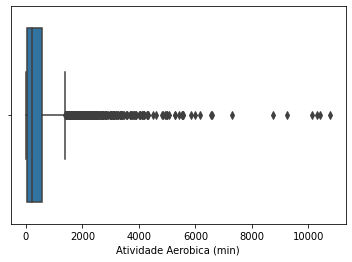

In [22]:
# visualizando os valores desta variável em um boxplot
sns.boxplot(x = df_new['Atividade Aerobica (min)']);

texto

In [23]:
# verificando quantas pessoas realizaram atividades maiores que 8000 minutos
maior_que_8000 = (df_new['Atividade Aerobica (min)'] > 8000).sum()
print('{} pessoas realizaram mais que 8.000 minutos de atividade aeróbicas em uma semana e serão retiradas do dataset'.format(maior_que_8000))

# retirando estas 6 pessoas do dataset
df_new = df_new[df_new['Atividade Aerobica (min)'] <= 8000]

6 pessoas realizaram mais que 8.000 minutos de atividade aeróbicas em uma semana e serão retiradas do dataset


## Análise das Perguntas

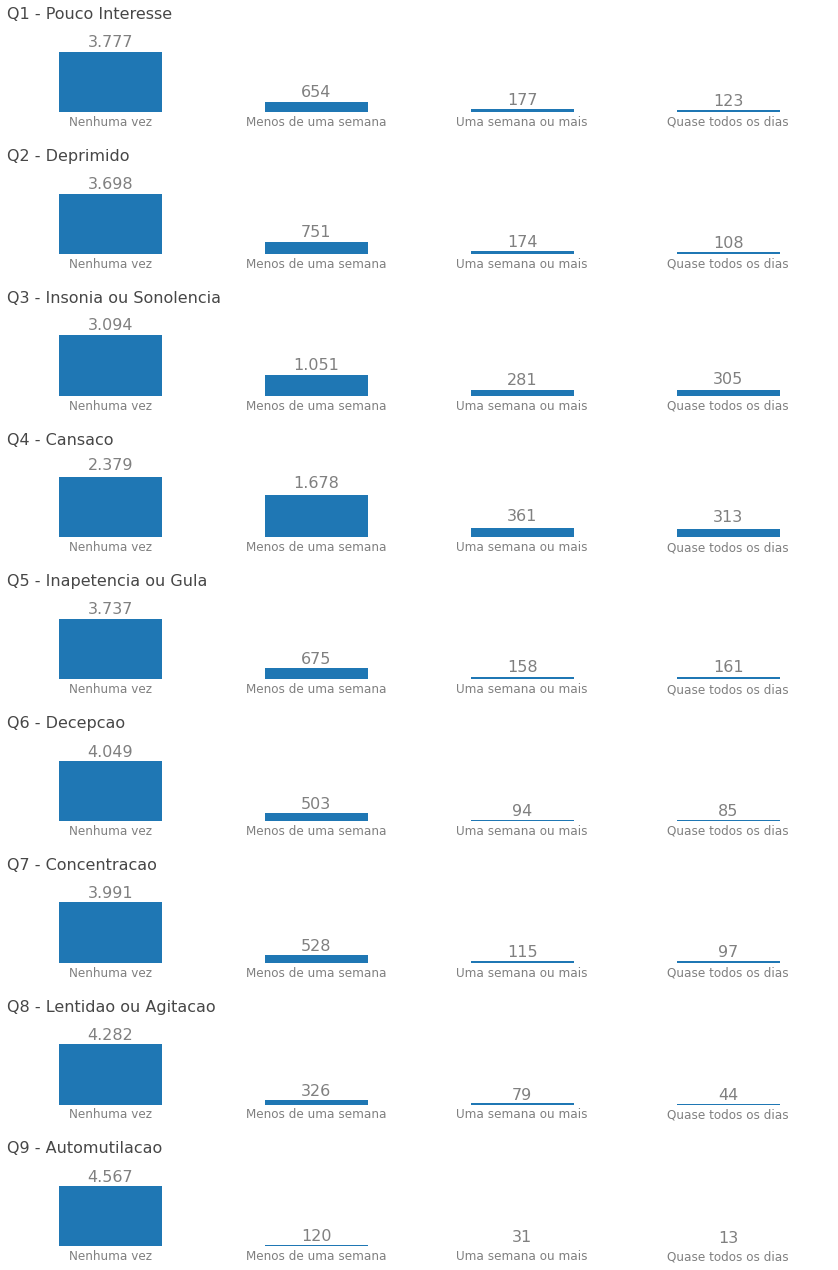

In [24]:
# criando a figure e o axis no matplotlib -> dúvidas? Acesse: https://thalesferraz.medium.com/como-fazer-gr%C3%A1ficos-rotulados-em-python-8d6d72006eaf
fig, ax = plt.subplots(figsize = (12,18), nrows = 9)

# Criando o gráfico para cada uma das perguntas realizadas no questionário
for i,f in enumerate(perguntas):
  df_new[f].value_counts().plot(kind='bar', ax = ax[i]);
  ax[i].set_xticklabels(respostas_questionarios,fontdict={'fontsize':12,'horizontalalignment':'center'},color='#6a6a6f',rotation=0)
  rotulos(ax =  ax[i], y = df_new[f].value_counts() , distancia = 300, titulo = f) # ver a função rotulos criada no início do código

# plotando o gráfico
plt.tight_layout(pad = 2.0);

del i,f

aparentemente pouca gente apresenta depressão

# Análise das Variáveis Categóricas

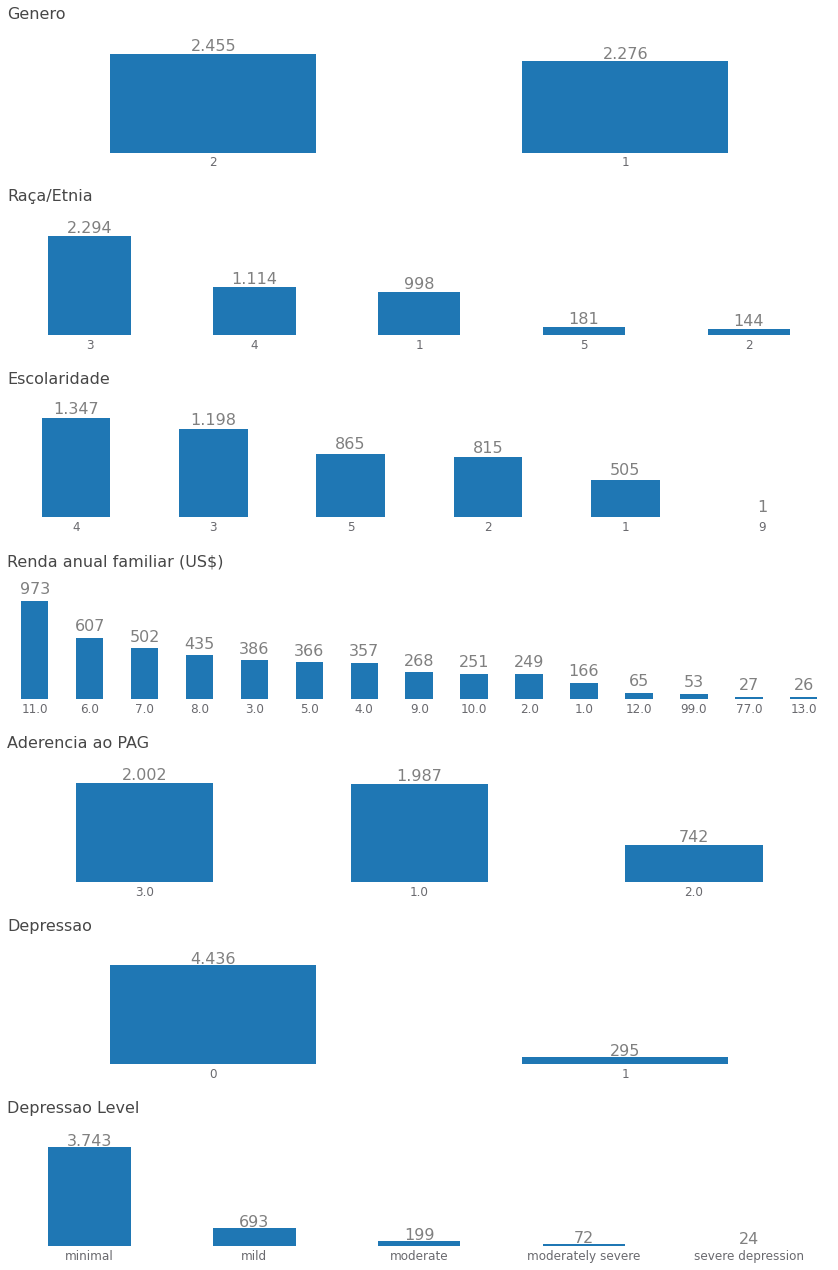

In [25]:
# criando a figure e o axis no matplotlib -> dúvidas? Acesse: https://thalesferraz.medium.com/como-fazer-gr%C3%A1ficos-rotulados-em-python-8d6d72006eaf
fig, ax = plt.subplots(figsize = (12,18), nrows = 7)

# criando o loop para cada uma das variáveis
for i,c in enumerate(categoricas):
  df_new[c].value_counts().sort_values(ascending=False).plot(kind='bar', ax = ax[i])
  rotulos(ax =  ax[i], y = list(df_new[c].value_counts()) , distancia = 70, titulo = c) # ver a função rotulos criada no início do código
  ax[i].set_xticklabels(df_new[c].value_counts().index,fontdict={'fontsize':12,'horizontalalignment':'center'},color='#6a6a6f',rotation=0)

# plotando os gráficos
plt.tight_layout(pad = 2.0);

del i,c

texto

## Análise das Variáveis com o PHQ-9

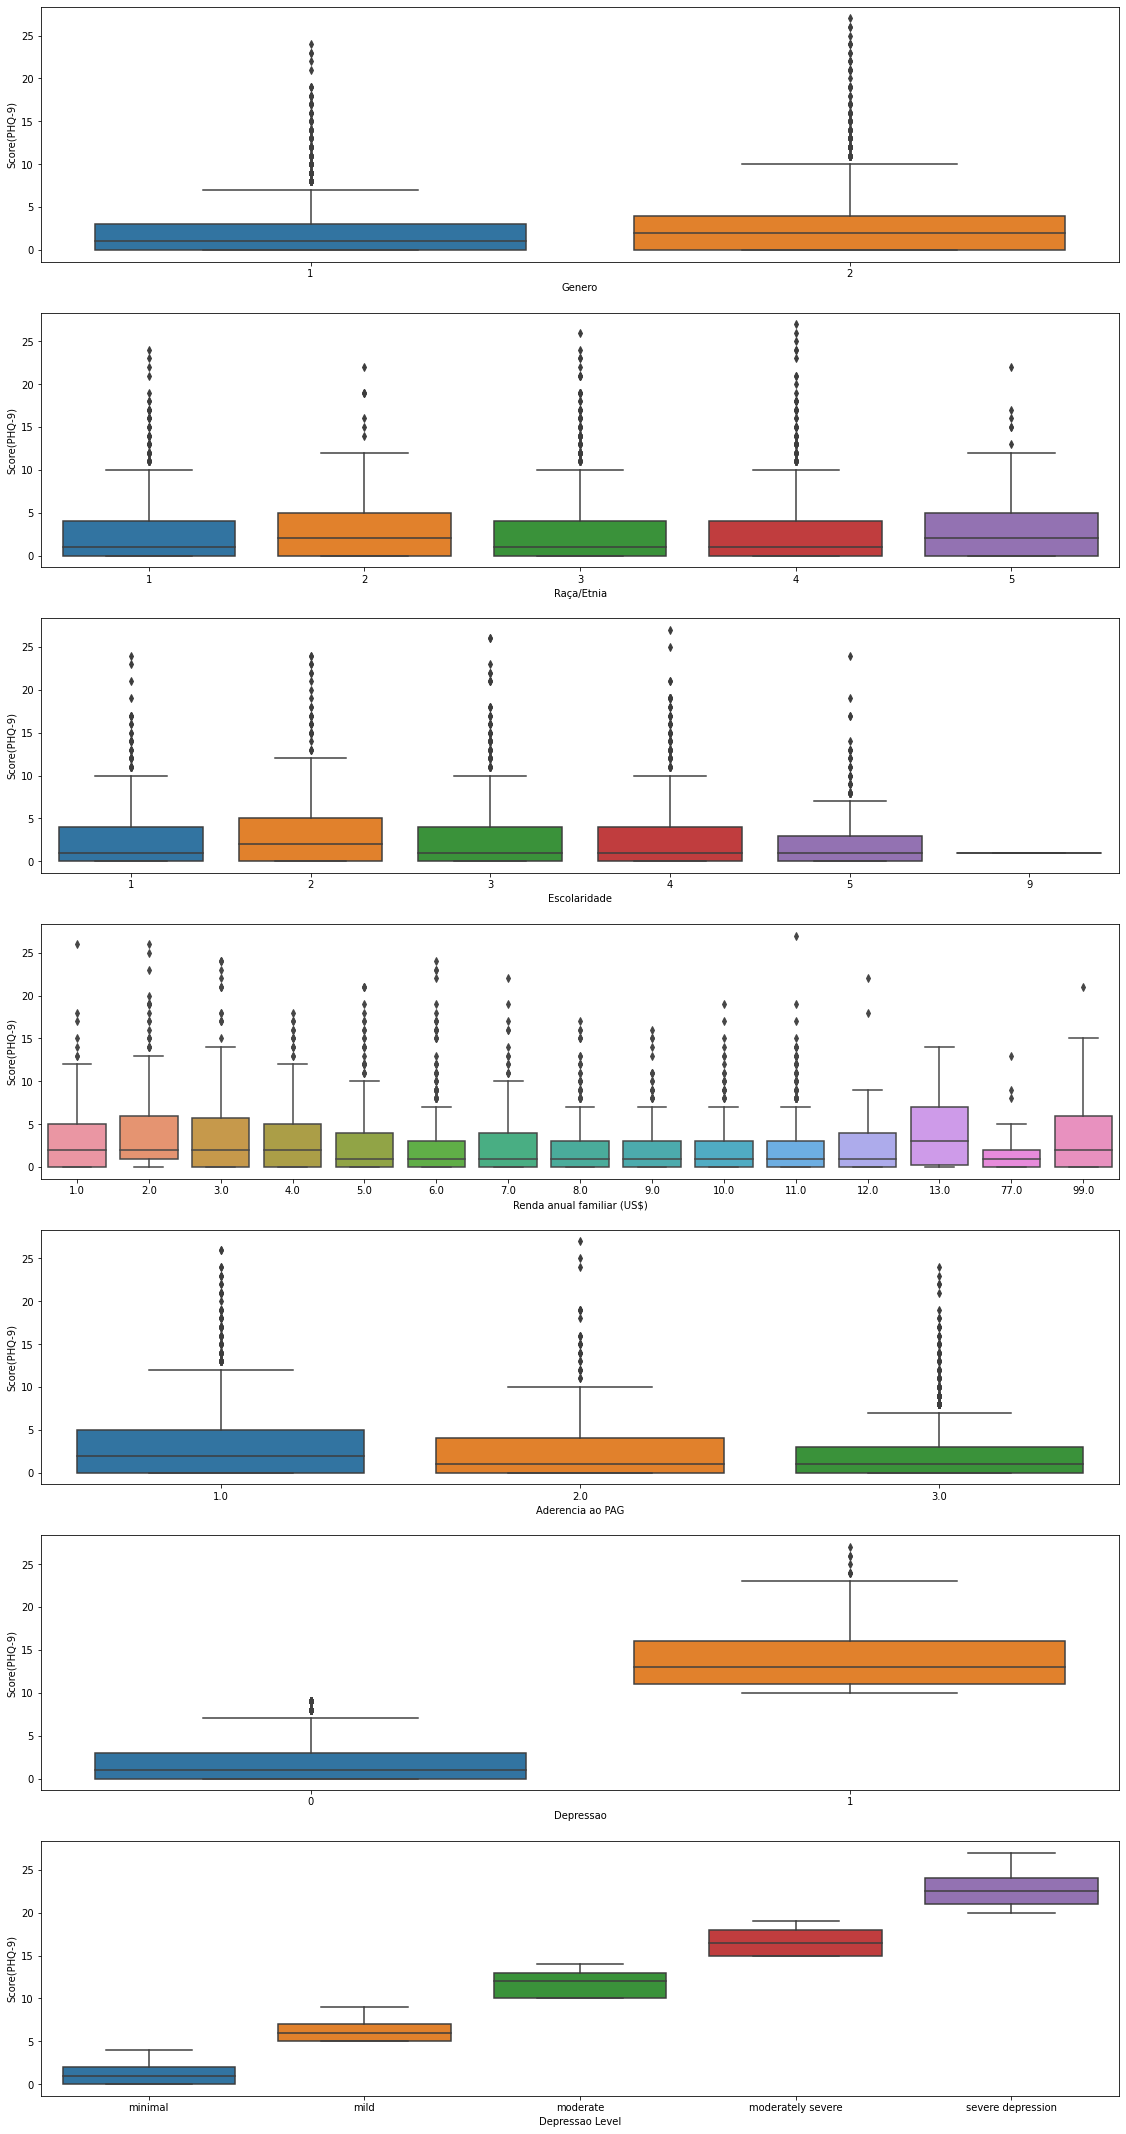

In [26]:
# criando a figure e o axis no matplotlib -> dúvidas? Acesse: https://thalesferraz.medium.com/como-fazer-gr%C3%A1ficos-rotulados-em-python-8d6d72006eaf
fig, ax = plt.subplots(figsize = (16,30), nrows = 7)

# verificando a relacao entre o score do PHQ-9 e as variáveis categoricas
for i,c in enumerate(categoricas):
  sns.boxplot(x = c, y = 'Score(PHQ-9)', data = df_new, ax = ax[i]);

# plotando os gráficos
plt.tight_layout(pad = 2.0);

del i,c

xxx

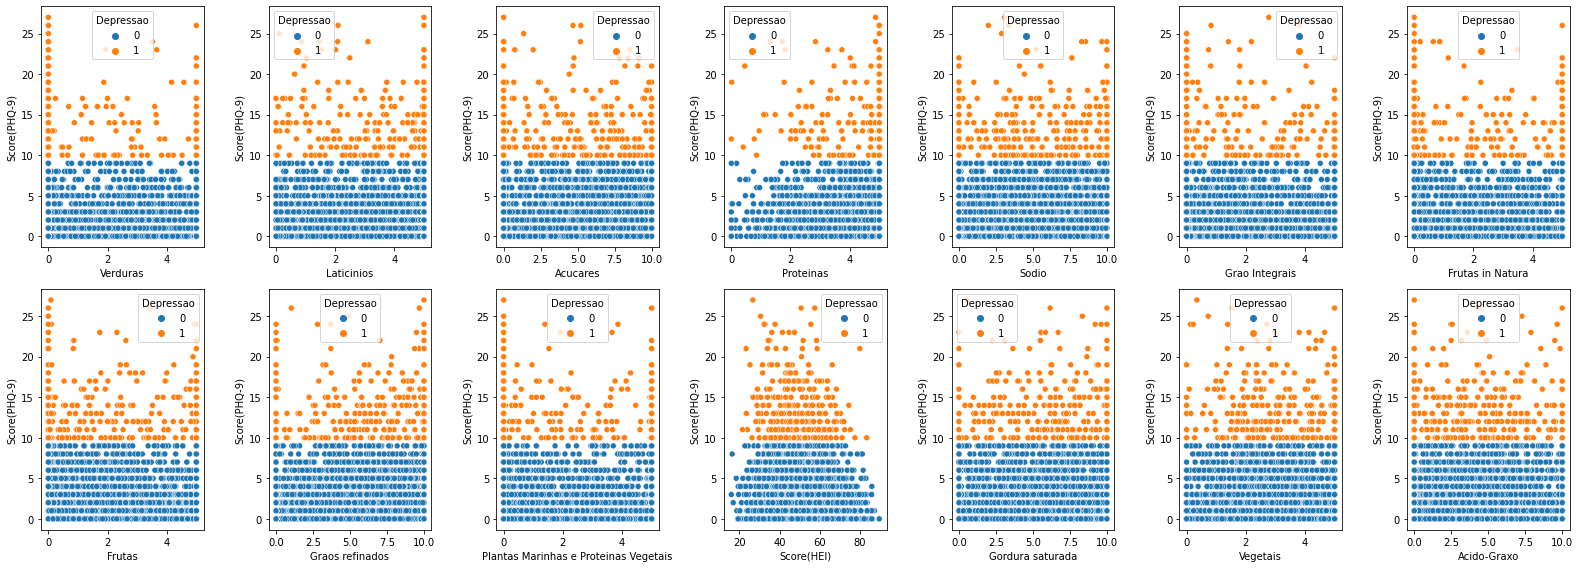

In [39]:
# criando a figure e o axis no matplotlib -> dúvidas? Acesse: https://thalesferraz.medium.com/como-fazer-gr%C3%A1ficos-rotulados-em-python-8d6d72006eaf
fig, ax = plt.subplots(figsize = (22,8), nrows = 2, ncols = 7)

# verificando a relacao entre o score do PHQ-9 e hábitos alimentares
alimentares = list(set(numericas) - set(['Score(PHQ-9)','Idade(anos)','Atividade Aerobica (min)'])) # criando uma lista apenas com as variáveis alimentares
for i in range(2):
  for j in range(7):
    a = alimentares[i*7 + j]
    sns.scatterplot(x = a, y = 'Score(PHQ-9)', hue = 'Depressao', data = df_new, ax = ax[i][j]);

# plotando os gráficos
plt.tight_layout();

del i,j,a

texto

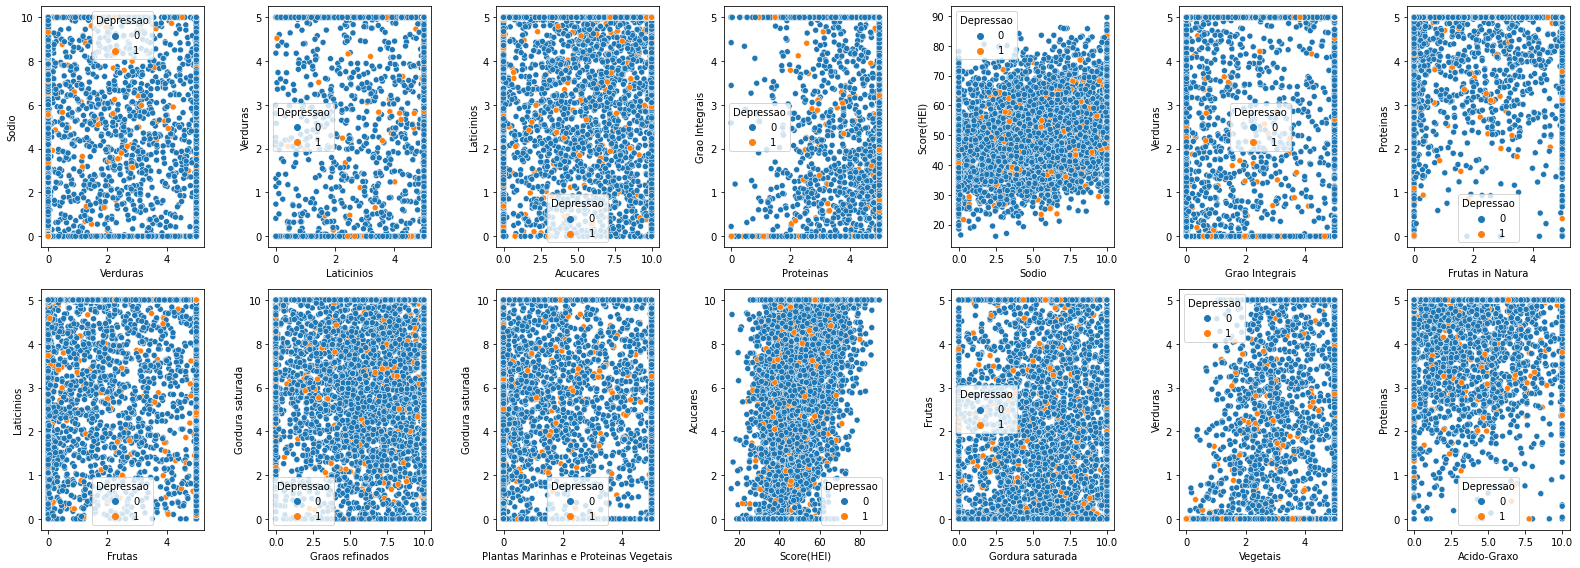

In [126]:
# tornando o notebook reprodutível
np.random.seed(43)

# criando a figure e o axis no matplotlib -> dúvidas? Acesse: https://thalesferraz.medium.com/como-fazer-gr%C3%A1ficos-rotulados-em-python-8d6d72006eaf
fig, ax = plt.subplots(figsize = (22,8), nrows = 2, ncols = 7)

# verificando a relação de hábitos alimentares entre si
alimentares = list(set(numericas) - set(['Score(PHQ-9)','Idade(anos)','Atividade Aerobica (min)'])) # criando uma lista apenas com as variáveis alimentares
for i in range(2):
  for j in range(7):
    a = i*7 + j
    b = np.random.randint(low = 0, high = 14) # numéro aleatório entre 0 e 13 para pegar um elemento da lista 'alimentares'
    sns.scatterplot(x = alimentares[a], y = alimentares[b], hue = 'Depressao', data = df_new, ax = ax[i][j]);

# plotando os gráficos
plt.tight_layout();

del i,j,a,b

texto

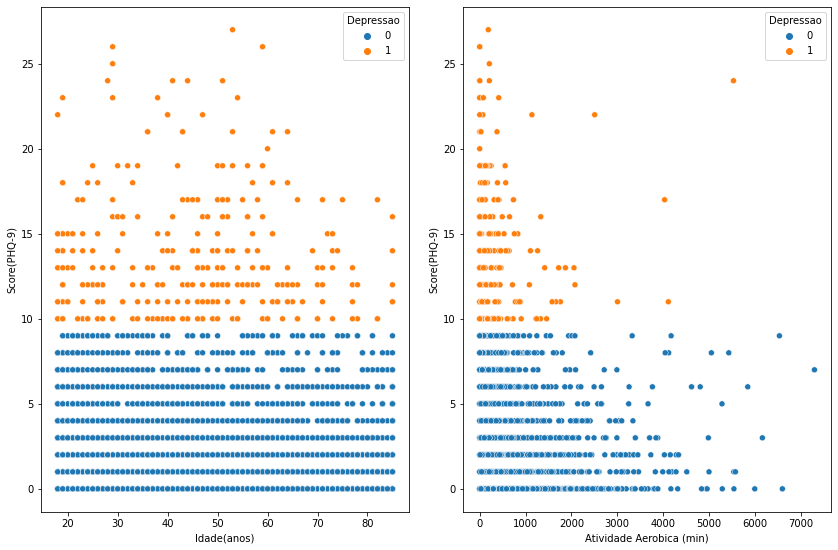

In [65]:
# criando a figure e o axis no matplotlib -> dúvidas? Acesse: https://thalesferraz.medium.com/como-fazer-gr%C3%A1ficos-rotulados-em-python-8d6d72006eaf
fig, ax = plt.subplots(figsize = (12,8),ncols = 2)

# criando os gráficos para comparação de Idade e de Atividade Aeróbica com o Score PHQ-9
sns.scatterplot(x = 'Idade(anos)', y = 'Score(PHQ-9)', hue= 'Depressao',data = df_new, ax = ax[0])
sns.scatterplot(x = 'Atividade Aerobica (min)', y = 'Score(PHQ-9)', hue= 'Depressao',data = df_new, ax = ax[1])

# plotar os gráficos
plt.tight_layout(pad = 2.0);

texto
observar atividade fisica e depressao

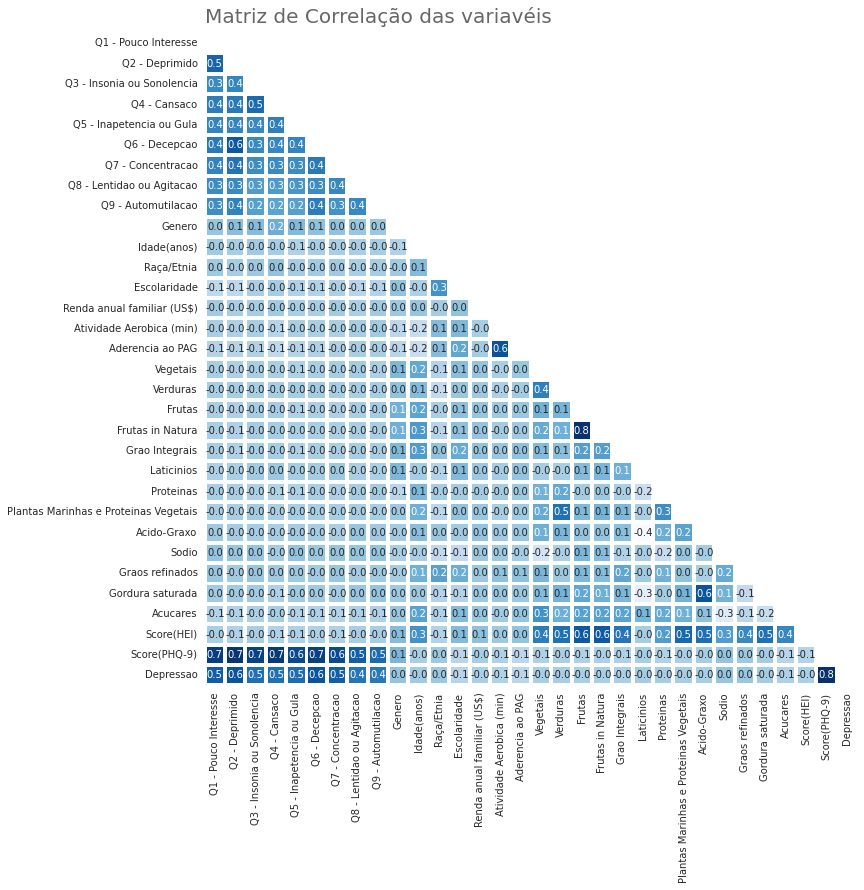

In [68]:
# criando a matriz de correlacao
matriz_de_correlacao = df_new.corr()

# criacao de uma mascara
mascara = np.zeros_like(matriz_de_correlacao)
mascara[np.triu_indices_from(mascara)] = True

# plotando o gráfico de correlação
with sns.axes_style('white'):
  fig,ax = plt.subplots(figsize=(16,12))
  sns.heatmap(matriz_de_correlacao,mask=mascara,square=True,annot=True,cmap='Blues',fmt='.1f',linewidths=3,ax=ax,cbar=False)
  ax.set_title('Matriz de Correlação das variavéis',loc='left',pad=10,fontdict={'fontsize':20},color='#666666')

texto

# 3. Realizando algumas análises através de testes de hipotéses.

* Qual o perfil de quem tem depressão? -> correlação com o index PHQ-9
* Pessoas mais pobres tem mais depressão.
* A alimentação está relacionada a depressão.
* Quantidade de Açúcar e Depressão.
* Pessoas mais velhas tem mais depressão.

escrever sobre este tópico

### Há alguma diferença significativa da média do índice de PHQ - 9 em relação ao gênero? Ou seja, a média das mulheres pode ser considerada maior que a dos homens?

* explicar o teste de hipótese utilizado

In [80]:
# verificando a quantidade de pessoas com depressão moderada de acordo com o gênero
df_new[df_new['Depressao'] == 1]['Genero'].value_counts()

2    175
1    120
Name: Genero, dtype: int64

In [91]:
# verificando a média do Score(PHQ-9) em relação ao gênero
df_new.groupby('Genero')['Score(PHQ-9)'].mean().round(2)

Genero
1    2.32
2    3.14
Name: Score(PHQ-9), dtype: float64

In [92]:
# quantidade de registros de cada amostra
df_new['Genero'].value_counts()

2    2455
1    2276
Name: Genero, dtype: int64

texto

In [93]:
# antes de realizarmos nosso teste de hipótese, temos que verificar se as variâncias são iguais utilizando o teste de levene
df_new.groupby('Genero')['Score(PHQ-9)'].var()

Genero
1    11.970212
2    15.611253
Name: Score(PHQ-9), dtype: float64

In [161]:
# separando o dataset entre os gêneros
masc = df_new[df_new['Genero'] == 1]['Score(PHQ-9)']
fem  = df_new[df_new['Genero'] == 2]['Score(PHQ-9)']

# realizando o teste de levene (escolhido devido a não-normalidade dos dados)
# https://towardsdatascience.com/levenes-test-for-equality-of-variances-explained-with-python-examples-f0445a19805f
levene(masc,fem)

LeveneResult(statistic=25.969684390663918, pvalue=3.6033363744774925e-07)

texto

In [117]:
# realizando o teste t
# https://docs.scipy.org/doc/scipy/reference/generated/scipy.stats.ttest_ind.html

stats.ttest_ind(a = fem, b = masc, equal_var=False,alternative='greater')

Ttest_indResult(statistic=7.612332061925396, pvalue=1.615786594273094e-14)

texto

### Há alguma diferença significativa da média do índice de PHQ - 9 em relação as etnias entrevistadas? (melhorar o texto)
* explicar o teste de hipótese utilizado

In [124]:
# verificando a média do score de cada amostra
df_new.groupby('Raça/Etnia')['Score(PHQ-9)'].mean()

Raça/Etnia
1    2.749499
2    3.437500
3    2.603313
4    2.903950
5    2.911602
Name: Score(PHQ-9), dtype: float64

In [127]:
# quantidade de registros de cada amostra
df_new['Raça/Etnia'].value_counts()

3    2294
4    1114
1     998
5     181
2     144
Name: Raça/Etnia, dtype: int64

texto -> anova

Seus dados de amostra cada grupo tem mais de 20 observações.

In [160]:
# separando os grupos
grupo_01 = df_new[df_new['Raça/Etnia'] == 1]['Score(PHQ-9)']
grupo_02 = df_new[df_new['Raça/Etnia'] == 2]['Score(PHQ-9)']
grupo_03 = df_new[df_new['Raça/Etnia'] == 3]['Score(PHQ-9)']
grupo_04 = df_new[df_new['Raça/Etnia'] == 4]['Score(PHQ-9)']
grupo_05 = df_new[df_new['Raça/Etnia'] == 5]['Score(PHQ-9)']

# aplicando no teste de levene
levene(grupo_01, grupo_02,grupo_03, grupo_04, grupo_05)

LeveneResult(statistic=2.5755679576441888, pvalue=0.03576748669625215)

texto explicando

# X. Referências

* [The PHQ-9: validity of a brief depression severity measure](https://pubmed.ncbi.nlm.nih.gov/11556941/)

* [Sensibilidade e especificidade do Patient Health Questionnaire-9 (PHQ-9) entre adultos da população geral](https://scielosp.org/article/csp/2013.v29n8/1533-1543/pt/)

* [Curso de Estatística do Básico ao Avançado -  Profª Renata Biaggi](https://www.renatabiaggi.com/)